In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
df = pd.read_csv("shark_tank_companies.csv")
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           423 non-null    object
 5   location                495 non-null    object
 6   website                 456 non-null    object
 7   askedfor                495 non-null    int64 
 8   exchangeforstake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [4]:
df.describe()

,episode,askedfor,exchangeforstake,valuation,season
count,495.000000,4.950000e+02,495.000000,4.950000e+02,495.000000
mean,12.125253,2.584909e+05,17.539394,2.165615e+06,4.048485
std,7.918133,4.615999e+05,10.061047,3.761971e+06,1.658518
min,1.000000,1.000000e+04,3.000000,4.000000e+04,1.000000
25%,5.000000,7.500000e+04,10.000000,4.400000e+05,3.000000
50%,11.000000,1.500000e+05,15.000000,1.000000e+06,4.000000
75%,18.000000,2.500000e+05,20.000000,2.000000e+06,5.000000
max,29.000000,5.000000e+06,100.000000,3.000000e+07,6.000000


In [5]:
df.shape

(495, 19)

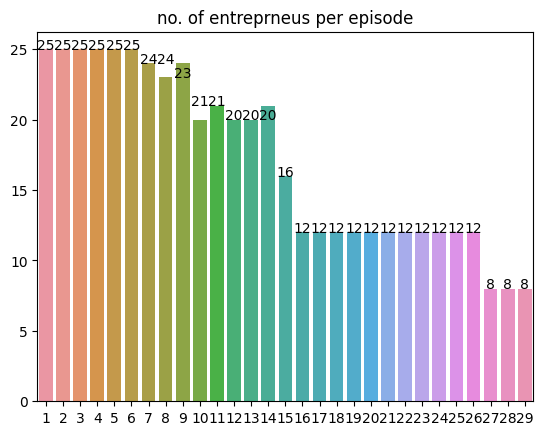

In [6]:
episode_data=df["episode"].value_counts()
sns.barplot(x=episode_data.index, y=episode_data.values)
plt.title("no. of entreprneus per episode")
for i in range(len(episode_data.index)):
    plt.text(i, episode_data.values[i],episode_data.values[i],ha='center', fontsize=10)

Text(0.5, 1.0, 'top 10 category came in shark tank')

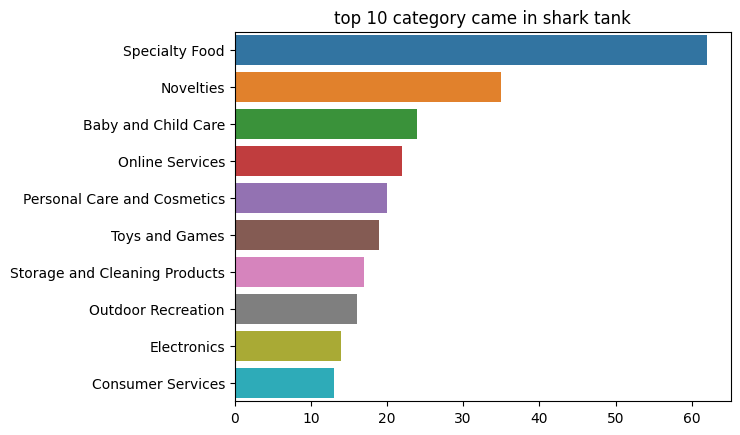

In [7]:
catg_data=df["category"].value_counts()[:10]
sns.barplot(y=catg_data.index,x=catg_data.values)
#plt.xticks(rotation=45)
plt.title("top 10 category came in shark tank")

Text(0.5, 1.0, 'total ask per top 10 category in Millions')

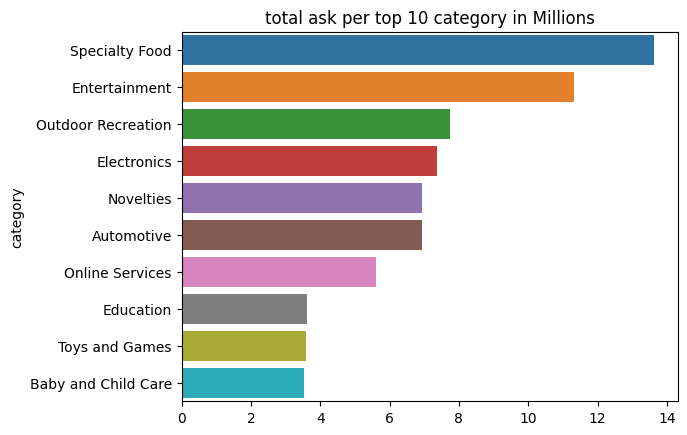

In [8]:
most_ask_catg= df.groupby("category")["askedfor"].sum().sort_values(ascending= False)[:10]
cmap1= mcolors.LinearSegmentedColormap.from_list("mycmap",['blue','black'])
color1=(np.linspace(0,1,len(most_ask_catg.index)))
sns.barplot(y=most_ask_catg.index,x=most_ask_catg.values/1000000)
plt.title("total ask per top 10 category in Millions")
#for i in range(len(most_ask_catg.index)):
   # plt.text(i,most_ask_catg.values[i],most_ask_catg[i], fontsize=10)

Text(0.5, 1.0, 'maximum ask per top 10 category in Millions')

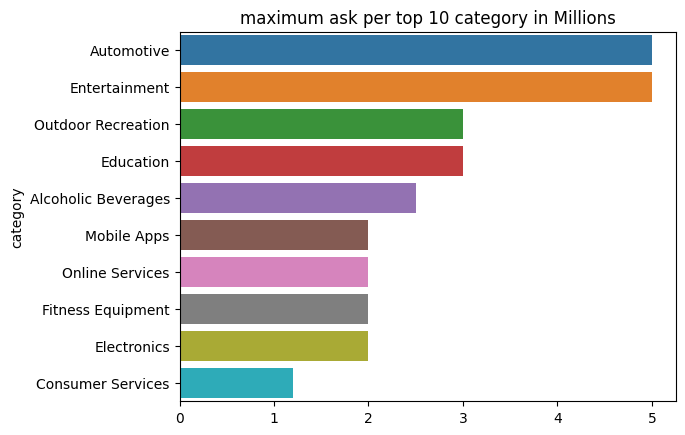

In [9]:
max_ask_catg= df.groupby("category")["askedfor"].max().sort_values(ascending= False)[:10]
cmap1= mcolors.LinearSegmentedColormap.from_list("mycmap",['blue','black'])
color1=(np.linspace(0,1,len(max_ask_catg.index)))
sns.barplot(y=max_ask_catg.index,x=max_ask_catg.values/1000000)
plt.title("maximum ask per top 10 category in Millions")

Text(0.5, 1.0, 'mean ask per top 10 category in Millions')

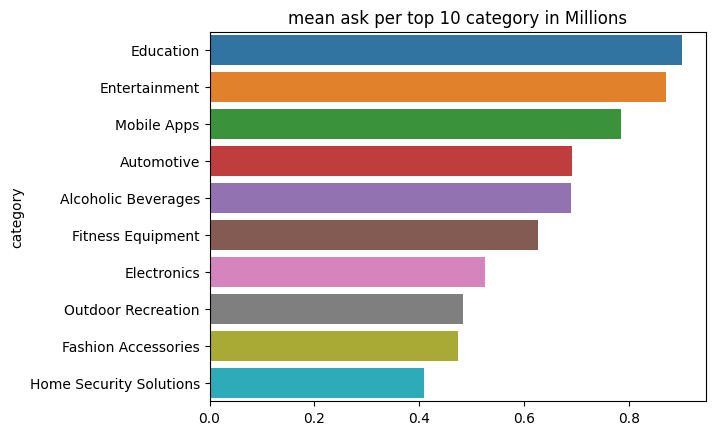

In [10]:
mean_ask_catg= df.groupby("category")["askedfor"].mean().sort_values(ascending= False)[:10]
cmap1= mcolors.LinearSegmentedColormap.from_list("mycmap",['blue','black'])
color1=(np.linspace(0,1,len(max_ask_catg.index)))
sns.barplot(y=mean_ask_catg.index,x=mean_ask_catg.values/1000000)
plt.title("mean ask per top 10 category in Millions")

Text(0.5, 1.0, 'total ask per episode in million')

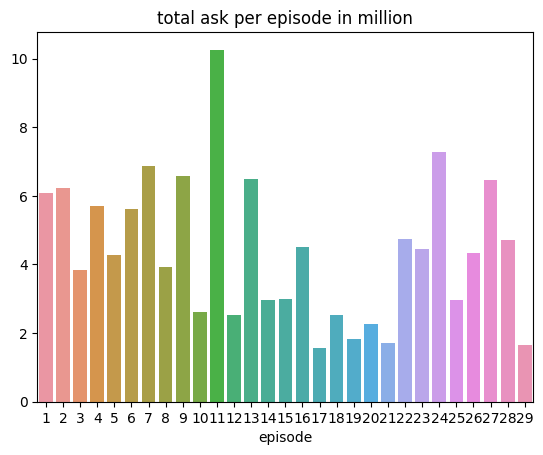

In [11]:
ask_episodewise= df.groupby("episode")["askedfor"].sum()
sns.barplot(x=ask_episodewise.index,y=ask_episodewise.values/1000000)
#plt.bar(ask_episodewise.index,ask_episodewise.values, color=['red','black'], edgecolor='black')
plt.title("total ask per episode in million")
#for i in range(len(ask_episodewise.values)):
    #plt.text(i,ask_episodewise[i],ask_episodewise[i],fontsize=10)

In [12]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


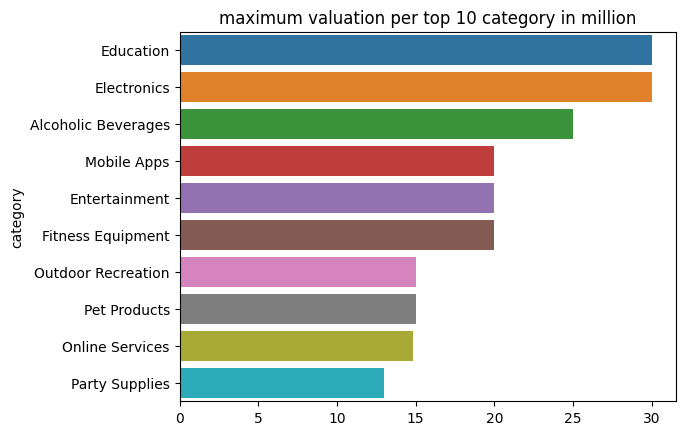

In [13]:
max_valuation_catg= df.groupby('category')["valuation"].max().sort_values(ascending= False)[:10]
sns.barplot(y=max_valuation_catg.index, x= max_valuation_catg.values/1000000)
plt.title("maximum valuation per top 10 category in million")
#plt.xticks(rotation=90)
plt.show()

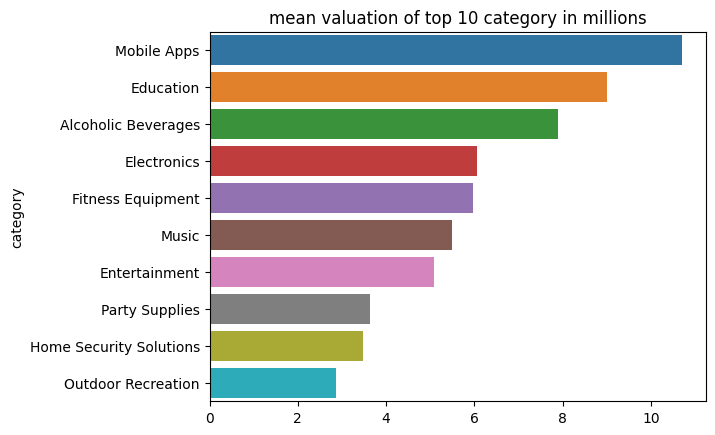

In [14]:
mean_catg_val= df.groupby('category')["valuation"].mean().sort_values(ascending= False)[:10]
sns.barplot(x=mean_catg_val.values/1000000,y=mean_catg_val.index)
#plt.pie(max_val_equity, labels=max_val_equity.index, autopct='%0.2f%%')
plt.title("mean valuation of top 10 category in millions")
#plt.xticks(rotation=90)
plt.show()

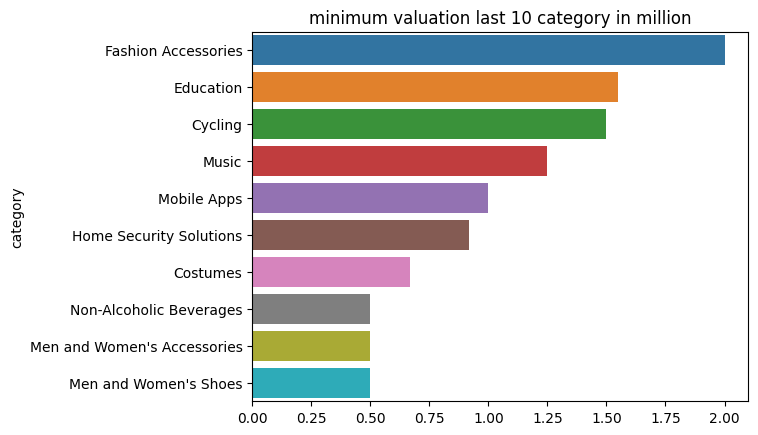

In [15]:
min_valuation_catg= df.groupby('category')["valuation"].min().sort_values(ascending= False)[:10]
sns.barplot(y=min_valuation_catg.index, x= min_valuation_catg.values/1000000)
plt.title("minimum valuation last 10 category in million")
#plt.xticks(rotation=90)
plt.show()

In [16]:
df['multiple_entreprenuers']= df['multiple_entreprenuers'].astype(int)
df['multiple_entreprenuers'].value_counts()

0    334
1    161
Name: multiple_entreprenuers, dtype: int64

In [17]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0


In [18]:
df["deal"]= df["deal"].astype(int)
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0


In [19]:
column = ['description','episode', 'category','entrepreneurs','location','website','season','shark1','shark2','shark3','shark4','shark5','episode_season','title']
df=df.drop(columns=column)

In [20]:
df.head()

,deal,askedfor,exchangeforstake,valuation,multiple_entreprenuers
0,0,1000000,15,6666667,0
1,1,460000,10,4600000,0
2,1,50000,15,333333,0
3,0,250000,25,1000000,0
4,0,1200000,10,12000000,0


In [21]:
X = df.drop(columns='deal')

In [22]:
Y = df['deal']

In [23]:
print(X,Y)

     askedfor  exchangeforstake  valuation  multiple_entreprenuers
0     1000000                15    6666667                       0
1      460000                10    4600000                       0
2       50000                15     333333                       0
3      250000                25    1000000                       0
4     1200000                10   12000000                       0
..        ...               ...        ...                     ...
490    100000                20     500000                       0
491    500000                10    5000000                       0
492    100000                 5    2000000                       1
493    100000                20     500000                       0
494    300000                10    3000000                       0

[495 rows x 4 columns] 0      0
1      1
2      1
3      0
4      0
      ..
490    1
491    1
492    1
493    0
494    1
Name: deal, Length: 495, dtype: int32


In [24]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit_transform(X)

array([[ 1.60801424, -0.25265392,  1.19767157, -0.69428807],
       [ 0.43698653, -0.75012286,  0.64775832, -0.69428807],
       [-0.45212709, -0.25265392, -0.48754636, -0.69428807],
       ...,
       [-0.3436986 , -1.24759179, -0.04406791,  1.44032433],
       [-0.3436986 ,  0.24481502, -0.44319844, -0.69428807],
       [ 0.09001536, -0.75012286,  0.2220191 , -0.69428807]])

In [25]:
#importing model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
prediction1 = model1.predict(X_test)

In [27]:
#importing accuracy score
from sklearn.metrics import accuracy_score
acc1= accuracy_score(Y_test,prediction1 )
print(acc1)

0.5503355704697986


In [32]:
#importing model2
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, Y_train)
prediction2=model2.predict(X_test)
acc2 = accuracy_score(Y_test, prediction2)
print(acc2)

0.46308724832214765
